# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
# np.where

import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'


In [3]:
file6 = pd.read_csv(url)

In [4]:
file6.columns = map(str.lower,file6.columns)

# Another way
# file6.columns = file6.columns.str.lower()
# file6.columns = file6.columns.str.replace(' ','_')
# file6 = file6.rename(columns={'st': 'state','customer':'customer_id'})

# df.columns

def spaceChange(mystring):
    return mystring.replace(" ","_")
    
file6.columns= list(map(spaceChange,file6.columns))


file6 = file6.rename(columns={'st': 'state','customer':'customer_id'})

print(file6.shape)
file6.head()


(4008, 11)


,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [5]:
# Clean up the gender
file6['gender'].unique()


array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [6]:
file6['gender'] = file6['gender'].replace({'Femal':'F', 'female':'F', 'f':'F','Male':'M'})
print(file6['gender'].unique())


[nan 'F' 'M']


In [7]:
# Clean up the State
file6['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [8]:
file6['state'] = file6['state'].replace({'WA':'Washington', 'AZ':'Arizona', 'Cali':'California'})
print(file6['state'].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' nan]


In [9]:
# Clean up the Education
file6['education'].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor', nan], dtype=object)

In [10]:
file6['education'] = file6['education'].replace({'Bachelors':'Bachelor'})
print(file6['education'].unique())

['Master' 'Bachelor' 'High School or Below' 'College' 'Doctor' nan]


In [11]:
# Clean up the Vehicle Class
file6['vehicle_class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car', nan], dtype=object)

In [12]:
file6['vehicle_class'] = file6['vehicle_class'].replace({'Sports Car':'Luxury', 'Luxury SUV':'Luxury', 'Luxury Car':'Luxury'})
print(file6['vehicle_class'].unique())

['Four-Door Car' 'Two-Door Car' 'SUV' 'Luxury' nan]


In [13]:
# Clean up the Customer Lifetime Value
file6['customer_lifetime_value'].unique()

array([nan, '697953.59%', '1288743.17%', ..., '2031499.76%', '323912.47%',
       '899704.02%'], dtype=object)

In [14]:
file6['customer_lifetime_value'] = file6['customer_lifetime_value'].str.replace('%','') ##ask why do we use str.replace
file6['customer_lifetime_value'].unique()

array([nan, '697953.59', '1288743.17', ..., '2031499.76', '323912.47',
       '899704.02'], dtype=object)

In [15]:
file6['customer_lifetime_value'] = pd.to_numeric(file6['customer_lifetime_value'], errors = 'coerce')/100
display(file6.dtypes)

customer_id                   object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [16]:
file6.head(10)

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.2978,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,F,College,5380.8986,55350.0,67.0,1/0/00,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,Master,7216.1003,0.0,101.0,1/0/00,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,Bachelor,24127.5040,14072.0,71.0,1/0/00,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,F,College,7388.1781,28812.0,93.0,1/0/00,Special Auto,Four-Door Car,425.527834


In [17]:
# Clean up the number_of_open_complaints
file6['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [18]:
# df["customer_lifetime_value"]= pd.to_numeric(["customer_lifetime_value"])
file6['customer_lifetime_value'] = pd.to_numeric(file6['customer_lifetime_value'], errors = 'coerce')
display(file6.dtypes)

#chatgpt
file6 =file6[file6['customer_lifetime_value'].notna() & (file6['customer_lifetime_value'] != 0)]

# file6["number_of_open_complaints"] = map(str.split("/")[1], file6["number_of_open_complaints"])

new_list= []

for item in file6["number_of_open_complaints"]:
    new_list.append(item.split("/")[1])

file6["number_of_open_complaints"] = new_list

file6.head()

customer_id                   object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.2978,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042


In [19]:
# Clean up the number_of_open_complaints
file6['number_of_open_complaints'].unique()

array(['0', '2', '1', '3', '5', '4'], dtype=object)

In [20]:
file6['number_of_open_complaints'] = pd.to_numeric(file6['number_of_open_complaints'], errors = 'coerce')
display(file6.dtypes)

customer_id                   object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [21]:
file6.isna().sum()

customer_id                    0
state                          0
gender                       116
education                      0
customer_lifetime_value        0
income                         0
monthly_premium_auto           0
number_of_open_complaints      0
policy_type                    0
vehicle_class                  0
total_claim_amount             0
dtype: int64

In [22]:
file6['state'].value_counts(dropna=False) #Show the nulls

California    331
Oregon        320
Arizona       211
Washington    108
Nevada         98
Name: state, dtype: int64

In [23]:
file6['gender'].value_counts(dropna=False) #Show the nulls

F      501
M      451
NaN    116
Name: gender, dtype: int64

In [24]:
file6['gender'].fillna('F',inplace=True)

In [25]:
file6['gender'].value_counts(dropna=False) #Show the nulls

F    617
M    451
Name: gender, dtype: int64

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [26]:
file6.shape

(1068, 11)

In [27]:
file6.isna().sum()

customer_id                  0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [28]:
# Already change in the cell above

In [29]:
file6.head()

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.2978,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042


In [30]:
display(file6.dtypes)

customer_id                   object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [31]:
def roundforme(x):
    return round(x,2)

file6['total_claim_amount'] = (file6['total_claim_amount' ].apply(roundforme))
file6['customer_lifetime_value'] = (file6['customer_lifetime_value' ].apply(roundforme))

In [32]:
file6.head()

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.46
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.47
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.88
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.27
5,OC83172,Oregon,F,Bachelor,8256.30,62902.0,69.0,0,Personal Auto,Two-Door Car,159.38


In [33]:
file6

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.46
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.47
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.88
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.27
5,OC83172,Oregon,F,Bachelor,8256.30,62902.0,69.0,0,Personal Auto,Two-Door Car,159.38
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1,Personal Auto,Four-Door Car,361.46
1067,VJ51327,California,F,High School or Below,20315.00,63209.0,102.0,2,Personal Auto,SUV,207.32
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,0,Personal Auto,Four-Door Car,633.60
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,0,Special Auto,SUV,547.20


# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [34]:
# Have another file for this task

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [35]:
file6["total_claim_amount"].describe()

count    1068.000000
mean      405.870140
std       292.916966
min         0.380000
25%       204.075000
50%       355.200000
75%       532.800000
max      2893.240000
Name: total_claim_amount, dtype: float64

# Round 3

In [36]:
# EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
# Show DataFrame info.
# Describe DataFrame.
# Show a plot of the Gender breakdown.
# Show a plot of Income by State.
# Show a plot of the Policy Type by the Total Claim Amount.
# Show a plot of the Education by Vehicle Class.
# What insights can you establish from these plots?
# What other plots do you feel would be beneficial?

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Show DataFrame info.
file6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                1068 non-null   object 
 1   state                      1068 non-null   object 
 2   gender                     1068 non-null   object 
 3   education                  1068 non-null   object 
 4   customer_lifetime_value    1068 non-null   float64
 5   income                     1068 non-null   float64
 6   monthly_premium_auto       1068 non-null   float64
 7   number_of_open_complaints  1068 non-null   int64  
 8   policy_type                1068 non-null   object 
 9   vehicle_class              1068 non-null   object 
 10  total_claim_amount         1068 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 100.1+ KB


In [39]:
file6.head()

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.46
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.47
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.88
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.27
5,OC83172,Oregon,F,Bachelor,8256.30,62902.0,69.0,0,Personal Auto,Two-Door Car,159.38


In [40]:
#Describe DataFrame.
file6.describe()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,7936.902566,39315.411985,192.691948,0.395131,405.870140
std,6434.784159,30484.373979,1603.241719,0.884764,292.916966
min,2004.350000,0.000000,61.000000,0.000000,0.380000
25%,4034.077500,14072.000000,68.000000,0.000000,204.075000
50%,5881.745000,36226.000000,82.500000,0.000000,355.200000
75%,8962.872500,64668.750000,109.250000,0.000000,532.800000
max,58166.550000,99960.000000,35354.000000,5.000000,2893.240000


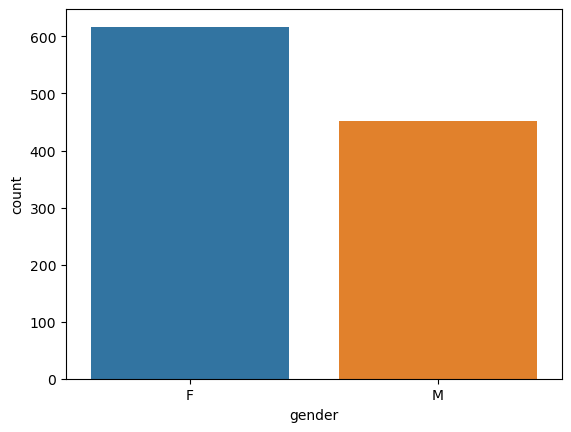

In [41]:
# Show a plot of the Gender breakdown

import matplotlib.pyplot as plt
import seaborn as sns 

sns.countplot(x="gender", data=file6)
plt.show()

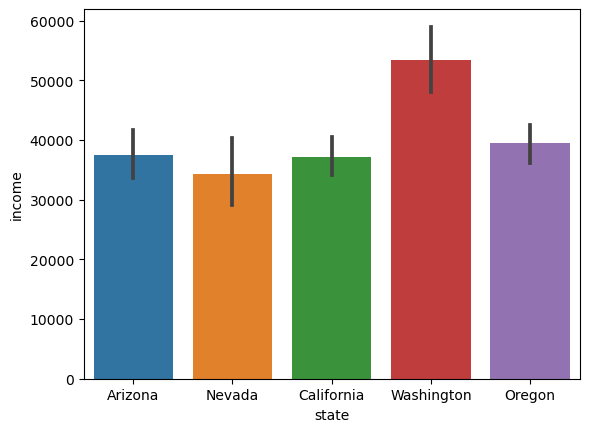

In [42]:
# Show a plot of Income by State.

sns.barplot(x="state", y="income", data=file6)
plt.show()


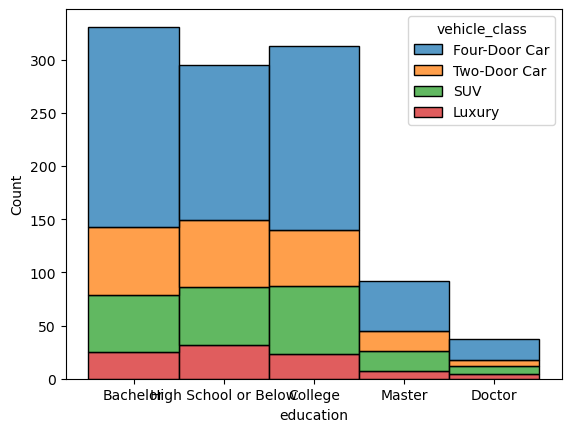

In [43]:
#  Show a plot of the Education by Vehicle Class.

sns.histplot(x="education", hue="vehicle_class", data=file6, multiple='stack')
plt.show()

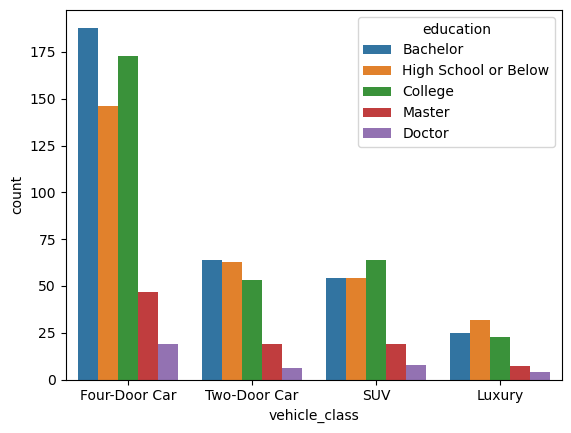

In [44]:
sns.countplot(x="vehicle_class", hue="education", data=file6,)
plt.show()

# Round 4

In [45]:
# Complete the following task

# Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. 
# (You can use np.number and object to select the numerical data types and categorical data types respectively)
# Now we will try to check the normality of the numerical variables visually
# Use seaborn library to construct distribution plots for the numerical variables
# Use Matplotlib to construct histograms
# Do the distributions for different numerical variables look like a normal distribution?
# For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column total_claim_amount later as the target variable.
# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# Write code for both the correlation matrix and for seaborn heatmap. 
# If there is no pair of features that have a high correlation, then do not drop any features

In [46]:
file6.dtypes

customer_id                   object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [47]:
numerical_columns=file6._get_numeric_data()
numerical_columns

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
1,6979.54,0.0,94.0,0,1131.46
2,12887.43,48767.0,108.0,0,566.47
3,7645.86,0.0,106.0,0,529.88
4,5363.08,36357.0,68.0,0,17.27
5,8256.30,62902.0,69.0,0,159.38
...,...,...,...,...,...
1066,3059.55,38644.0,78.0,1,361.46
1067,20315.00,63209.0,102.0,2,207.32
1068,3239.12,16061.0,88.0,0,633.60
1069,4626.80,79487.0,114.0,0,547.20


In [48]:
catagorical_columns=file6.select_dtypes(include=['object'])
catagorical_columns

,customer_id,state,gender,education,policy_type,vehicle_class
1,QZ44356,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car
5,OC83172,Oregon,F,Bachelor,Personal Auto,Two-Door Car
...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,Personal Auto,Four-Door Car
1067,VJ51327,California,F,High School or Below,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,Special Auto,SUV


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
numerical = file6.select_dtypes(exclude = "object")


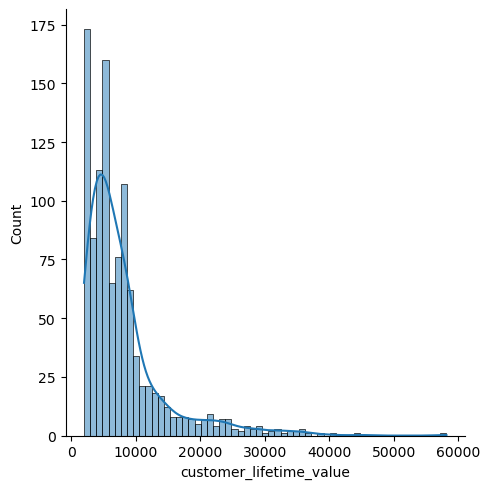

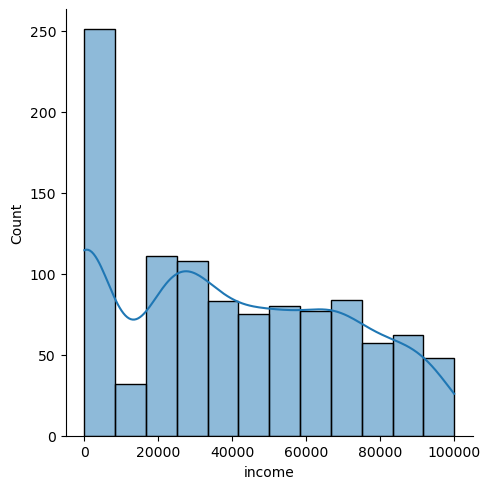

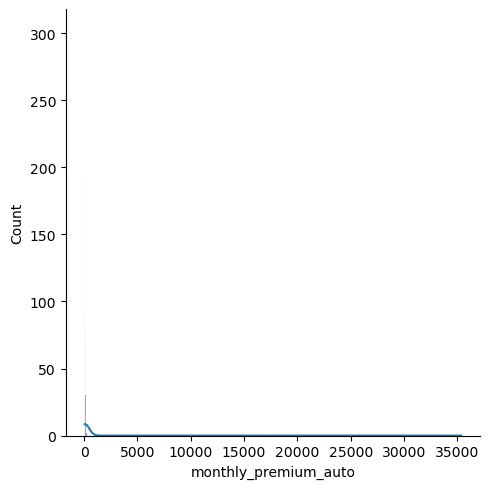

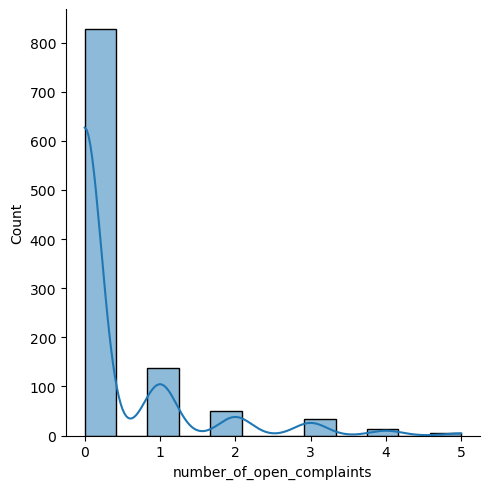

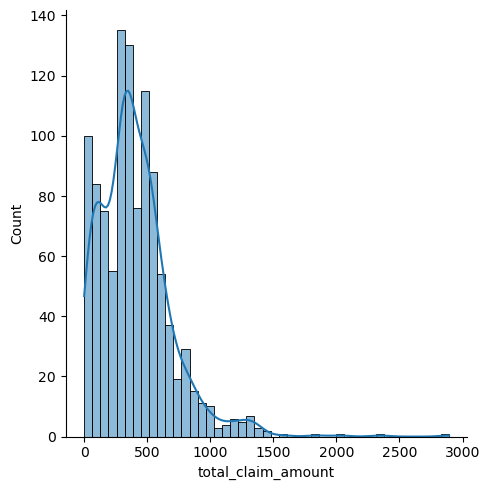

In [51]:
for i1 in numerical:
    sns.displot(numerical[i1],kde=True)
    plt.show()
   
    
# Generally the distribution for numerical data is just like normal distribution with also outlier 
# 

<Axes: >

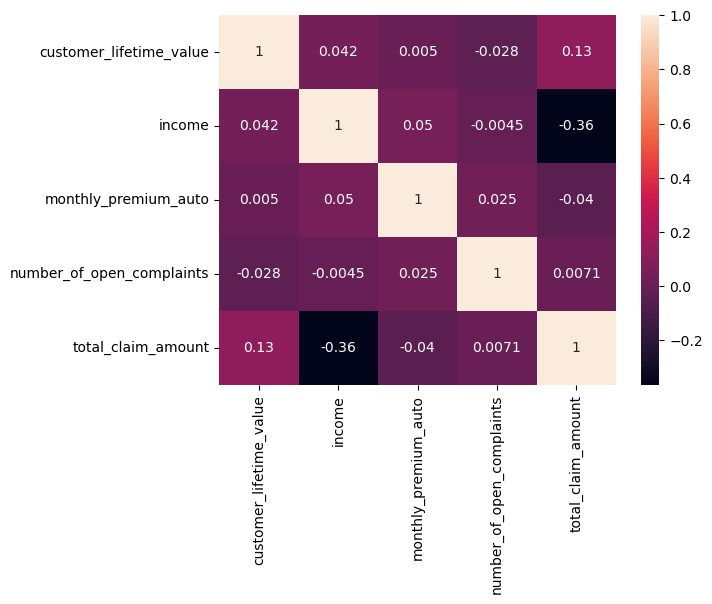

In [52]:
# For the numerical variables, check the multicollinearity between the features. 

corr_matrix = numerical.corr()
sns.heatmap(corr_matrix,annot=True)

# Based on the date below there is no high corelation so we cannot drop any column. 


# Round 5

In [53]:
# Write code for both the correlation matrix and for seaborn heatmap. 
# If there is no pair of features that have a high correlation, then do not drop any features

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

y = numerical['total_claim_amount']
X = file6.drop(['total_claim_amount'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)


In [55]:
# Normalizing data: make data range from 0 - 1, instead of from min to max

transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
X_norm = pd.DataFrame(x_normalized, columns=X_num.columns)
X_norm

(1068, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,0.088586,0.000000,0.000935,0.0
1,0.193779,0.487865,0.001332,0.0
2,0.100450,0.000000,0.001275,0.0
3,0.059804,0.363715,0.000198,0.0
4,0.111320,0.629272,0.000227,0.0
...,...,...,...,...
1063,0.018788,0.386595,0.000482,0.2
1064,0.326032,0.632343,0.001162,0.4
1065,0.021986,0.160674,0.000765,0.0
1066,0.046694,0.795188,0.001502,0.0


In [56]:
# # scaling standard scaler: make data distributed with mean=0 and std=1
# transformer = StandardScaler().fit(X_num)
# x_standardized = transformer.transform(X_num)
# print(x_standardized.shape)
# pd.DataFrame(x_standardized, columns=X_num.columns)

In [57]:
file6.head()

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.46
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.47
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.88
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.27
5,OC83172,Oregon,F,Bachelor,8256.30,62902.0,69.0,0,Personal Auto,Two-Door Car,159.38


In [58]:
file6_reduced = file6.drop(['customer_id'],axis=1)
file6_reduced.columns

Index(['state', 'gender', 'education', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'number_of_open_complaints', 'policy_type',
       'vehicle_class', 'total_claim_amount'],
      dtype='object')

In [59]:
# File separation into numerical and categorical
X_for_p_num = file6_reduced.select_dtypes(include = np.number)
X_for_p_cat = file6_reduced.select_dtypes(include = object)


In [60]:
X_for_p_cat.head()

,state,gender,education,policy_type,vehicle_class
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car
5,Oregon,F,Bachelor,Personal Auto,Two-Door Car


In [61]:
X_for_p_cat.head()

,state,gender,education,policy_type,vehicle_class
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car
5,Oregon,F,Bachelor,Personal Auto,Two-Door Car


In [62]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_for_p_cat)

cols = encoder.get_feature_names_out(input_features=X_for_p_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_for_p_cat).toarray(),columns=cols)

X_cat_encode.head()

,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [63]:
#merge back all of our labels

X_for_p = pd.concat([X_norm, X_cat_encode], axis=1)

X_for_p.head()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.088586,0.000000,0.000935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.193779,0.487865,0.001332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.100450,0.000000,0.001275,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.059804,0.363715,0.000198,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.111320,0.629272,0.000227,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [64]:
X_for_p.describe()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,0.105632,0.393311,0.003731,0.079026,0.309925,0.091760,0.299625,0.101124,0.422285,0.293071,0.034644,0.276217,0.086142,0.727528,0.053371,0.085206,0.186330,0.191948
std,0.114575,0.304966,0.045427,0.176953,0.462679,0.288823,0.458309,0.301634,0.494155,0.455384,0.182963,0.447335,0.280706,0.445440,0.224877,0.279319,0.389555,0.394017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036140,0.140776,0.000198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.069039,0.362405,0.000609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.123900,0.646946,0.001367,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Round 6 --> Name : X_for_p

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_for_p, y, test_size=0.2, random_state=42)


In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(854, 18)
(214, 18)
(854,)
(214,)


In [67]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
910,0.054868,0.315586,0.000113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
944,0.038475,0.559194,0.001218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
567,0.008780,0.248349,0.000085,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
106,0.069876,0.405472,0.000368,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
587,0.058605,0.502201,0.002097,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.014784,0.245158,0.000283,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
466,0.061630,0.544438,0.000198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,0.231815,0.282733,0.003712,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1044,0.331731,0.841397,0.000085,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [68]:
y_train

912     100.05
946     499.20
569     155.94
108      30.57
589     637.06
         ...  
332     511.20
468      75.50
123     921.60
1047    334.41
862     404.27
Name: total_claim_amount, Length: 854, dtype: float64

In [69]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [70]:
#import library
from sklearn.linear_model import LinearRegression as linreg

lm = linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred = lm.predict(X_test)   # model prediction

In [71]:
from sklearn.metrics import r2_score

predictions = lm.predict(X_train)
r2_score(y_train, predictions)
print('train R2:',r2_score(y_train, predictions))

train R2: 0.36724178424481024


In [72]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)
print('test R2:',r2_score(y_test, predictions_test))

test R2: 0.4053255857934759


In [73]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(lm.predict(X_train), y_train)
test_mse=mse(y_pred, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 56854.027858452995 -- test MSE: 41159.66966739367


In [74]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 238.44082674419033 -- test RMSE: 202.87846033375172


In [75]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(lm.predict(X_train), y_train)
test_mae=mae(y_pred, y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))

train MAE: 169.51708069368155 -- test MAE: 157.88542168310047


# Round 7 : Try to improve using Standard 

In [76]:
# Scaling Standard Scaler
transformer = MinMaxScaler().fit(X_num)
X_norm = transformer.transform(X_num)
print(X_norm.shape)
X_num_scale = pd.DataFrame(X_norm, columns=X_num.columns)
X_num_scale.head()

(1068, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,0.088586,0.000000,0.000935,0.0
1,0.193779,0.487865,0.001332,0.0
2,0.100450,0.000000,0.001275,0.0
3,0.059804,0.363715,0.000198,0.0
4,0.111320,0.629272,0.000227,0.0


In [77]:
X_for_p.head()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.088586,0.000000,0.000935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.193779,0.487865,0.001332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.100450,0.000000,0.001275,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.059804,0.363715,0.000198,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.111320,0.629272,0.000227,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [78]:
#new test train split with new X2 value of Standard Scaler.

X_train, X_test, y_train, y_test=train_test_split(X_for_p, y, test_size=.2) 


In [79]:
lm=linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred_lm=lm.predict(X_test)   # predictions

In [80]:
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.38094575845432943 -- test R2: 0.3333858502374726


In [81]:
X_train, X_test, y_train, y_test=train_test_split(X_for_p, y, test_size=.1)

In [82]:
lm=linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred_lm=lm.predict(X_test)   # predictions

In [83]:
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.3665331688195662 -- test R2: 0.46070844472439376


In [84]:
train_mse=mse(lm.predict(X_train), y_train)
test_mse=mse(y_pred_lm, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 55626.104602445426 -- test MSE: 35972.78523160398


In [85]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 235.85187004229036 -- test RMSE: 189.66492883926637


In [86]:
train_mae=mae(lm.predict(X_train), y_train)
test_mae=mae(y_pred_lm, y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))

train MAE: 169.0486661441938 -- test MAE: 142.35209779698744


In [87]:
compare_TotalClaimAmount = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_lm})
compare_TotalClaimAmount

,Actual,Predicted
968,31.76,290.805991
115,489.60,659.108207
959,266.17,357.368122
1040,345.60,508.087570
859,158.08,712.056042
...,...,...
407,799.93,782.649024
398,556.80,304.759297
690,169.29,216.168744
194,302.40,449.894265


In [88]:
compare_TotalClaimAmount['Difference']= compare_TotalClaimAmount['Actual']- compare_TotalClaimAmount['Predicted']

In [89]:
compare_TotalClaimAmount

,Actual,Predicted,Difference
968,31.76,290.805991,-259.045991
115,489.60,659.108207,-169.508207
959,266.17,357.368122,-91.198122
1040,345.60,508.087570,-162.487570
859,158.08,712.056042,-553.976042
...,...,...,...
407,799.93,782.649024,17.280976
398,556.80,304.759297,252.040703
690,169.29,216.168744,-46.878744
194,302.40,449.894265,-147.494265


In [90]:
compare_TotalClaimAmount['AbsAmount'] = compare_TotalClaimAmount['Difference'].abs()

In [91]:
compare_TotalClaimAmount

,Actual,Predicted,Difference,AbsAmount
968,31.76,290.805991,-259.045991,259.045991
115,489.60,659.108207,-169.508207,169.508207
959,266.17,357.368122,-91.198122,91.198122
1040,345.60,508.087570,-162.487570,162.487570
859,158.08,712.056042,-553.976042,553.976042
...,...,...,...,...
407,799.93,782.649024,17.280976,17.280976
398,556.80,304.759297,252.040703,252.040703
690,169.29,216.168744,-46.878744,46.878744
194,302.40,449.894265,-147.494265,147.494265


In [92]:
compare_TotalClaimAmount['AbsAmount'].mean()

142.35209779698744